In [1]:
# HIDDEN
from datascience import *
import matplotlib
path_data = '../../../data/'
# matplotlib.use('Agg', warn=False)
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.set_printoptions(threshold=50)

### Visualizing Categorical Distributions ###

Data come in many forms that are not numerical. Data can be pieces of music, or places on a map. They can also be categories into which you can place individuals. Here are some examples of *categorical* variables.

- The individuals are cartons of ice-cream, and the variable is the flavor in the carton.
- The individuals are professional basketball players, and the variable is the player's team.
- The individuals are years, and the variable is the genre of the highest grossing movie of the year.
- The individuals are survey respondents, and the variable is the response they choose from among "Not at all satisfied," "Somewhat satisfied," and "Very satisfied."

The table `icecream` contains data on 30 cartons of ice-cream. 

In [2]:
icecream = Table().with_columns(
    'Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
    'Number of Cartons', make_array(16, 5, 9)
)
icecream

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


The *values* of the categorical variable "flavor" are chocolate, strawberry, and vanilla. The table shows the number of cartons of each flavor. We call this a *distribution table*. A *distribution* shows all the values of a variable, along with the frequency of each one.

### Bar Chart ###
The bar chart is a familiar way of visualizing categorical distributions. It displays a bar for each category. The bars are equally spaced and equally wide. The length of each bar is proportional to the frequency of the corresponding category.

We will draw bar charts with horizontal bars because it's easier to label the bars that way. The Table method is therefore called `barh`. It takes two arguments: the first is the column label of the categories, and the second is the column label of the frequencies.

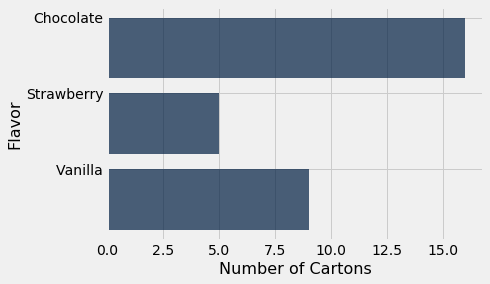

In [3]:
icecream.barh('Flavor', 'Number of Cartons')

If the table consists just of a column of categories and a column of frequencies, as in `icecream`, the method call is even simpler. You can just specify the column containing the categories, and `barh` will use the values in the other column as frequencies.

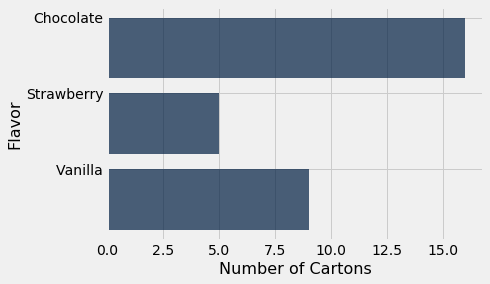

In [4]:
icecream.barh('Flavor')

### Features of Categorical Distributions ###
Apart from purely visual differences, there is an important fundamental distinction between bar charts and the two graphs that we saw in the previous sections. Those were the scatter plot and the line plot, both of which display two numerical variables – the variables on both axes are numerical. In contrast, the bar chart has categories on one axis and numerical frequencies on the other.

This has consequences for the chart. First, the width of each bar and the space between consecutive bars is entirely up to the person who is producing the graph, or to the program being used to produce it. Python made those choices for us. If you were to draw the bar graph by hand, you could make completely different choices and still have a perfectly correct bar graph, provided you drew all the bars with the same width and kept all the spaces the same.

Most importantly, the bars can be drawn in any order. The categories "chocolate," "vanilla," and "strawberry" have no universal rank order, unlike for example the numbers 5, 7, and 10.

This means that we can draw a bar chart that is easier to interpret, by rearranging the bars in decreasing order. To do this, we first rearrange the rows of `icecream` in decreasing order of `Number of Cartons`, and then draw the bar chart.

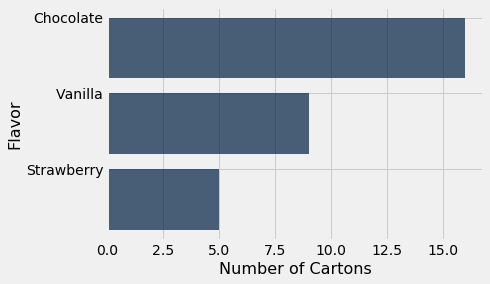

In [5]:
icecream.sort('Number of Cartons', descending=True).barh('Flavor')

This bar chart contains exactly the same information as the previous ones, but it is a little easier to read. While this is not a huge gain in reading a chart with just three bars, it can be quite significant when the number of categories is large.

### Grouping Categorical Data ###
To construct the table `icecream`, someone had to look at all 30 cartons of ice-cream and count the number of each flavor. But if our data does not already include frequencies, we have to compute the frequencies before we can draw a bar chart. Here is an example where this is necessary.

The table `top` consists of U.S.A.'s top grossing movies of all time. The first column contains the title of the movie; *Star Wars: The Force Awakens* has the top rank, with a box office gross amount of more than 900 million dollars in the United States. The second column contains the name of the studio that produced the movie. The third contains the domestic box office gross in dollars, and the fourth contains the  gross amount that would have been earned from ticket sales at 2016 prices. The fifth contains the release year of the movie. 

There are 200 movies on the list. Here are the top ten according to unadjusted gross receipts.

In [7]:
top = Table.read_table('https://umass-data-science.github.io/CS108website/notebooks/top_movies.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


The Disney subsidiary Buena Vista shows up frequently in the top ten, as do Fox and Warner Brothers. Which studios will appear most frequently if we look among all 200 rows?

To figure this out, first notice that all we need is a table with the movies and the studios; the other information is unnecessary.

In [8]:
movies_and_studios = top.select('Title', 'Studio')

The Table method `group` allows us to count how frequently each studio appears in the table, by calling each studio a category and assigning each row to one category. The `group` method takes as its argument the label of the column that contains the categories, and returns a table of counts of rows in each category. The column of counts is always called `count`, but you can change that if you like by using `relabeled`.

In [9]:
movies_and_studios.group('Studio')

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


Thus `group` creates a distribution table that shows how the movies are distributed among the categories (studios). 

We can now use this table, along with the graphing skills that we acquired above, to draw a bar chart that shows which studios are most frequent among the 200 highest grossing movies.

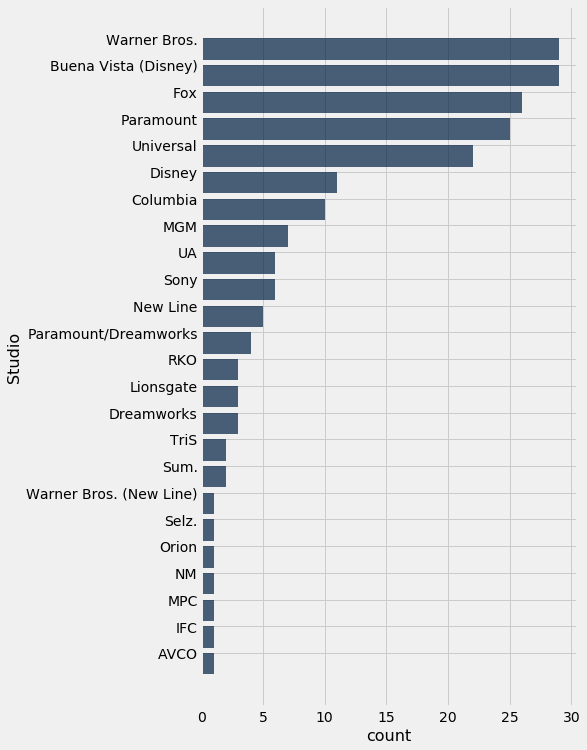

In [10]:
studio_distribution = movies_and_studios.group('Studio')
studio_distribution.sort('count', descending=True).barh('Studio')

Warner Brothers and Buena Vista are the most common studios among the top 200 movies. Warner Brothers produces the Harry Potter movies and Buena Vista produces Star Wars. 

Because total gross receipts are being measured in unadjusted dollars, it is not very surprising that the top movies are more frequently from recent years than from bygone decades. In absolute terms, movie tickets cost more now than they used to, and thus gross receipts are higher. This is borne out by a bar chart that show the distribution of the 200 movies by year of release.

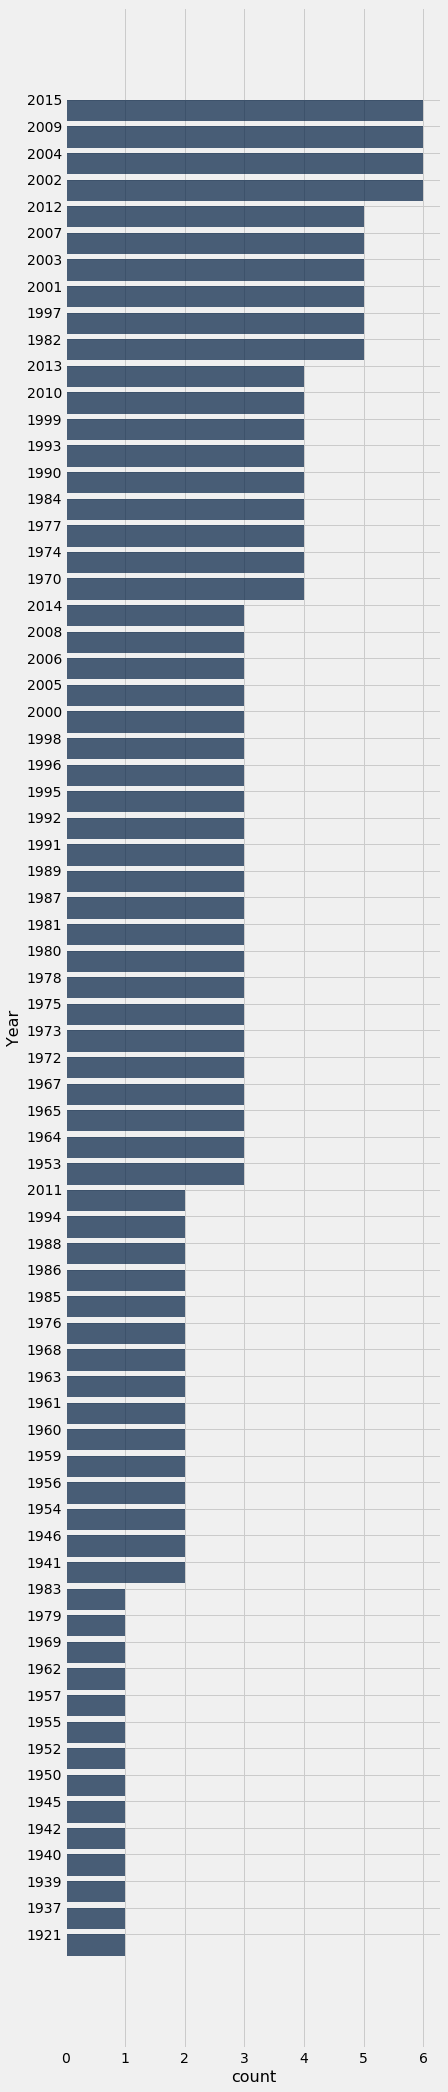

In [11]:
movies_and_years = top.select('Title', 'Year')
movies_and_years.group('Year').sort('count', descending=True).barh('Year')

All of the longest bars correspond to years after 2000. This is consistent with our observation that recent years should be among the most frequent.

### Towards numerical variables ###
There is something unsettling about this chart. Though it does answer the question of which release years appear most frequently among the 200 top grossing movies, it doesn't list all the years in chronological order. It is treating `Year` as a categorical variable. 

But years are fixed chronological units that do have an order. They also have fixed numerical spacings relative to each other. Let's see what happens when we try to take that into account.

By default, `barh` sorts the categories (years) from lowest to highest. So we will run the code without sorting by count. 

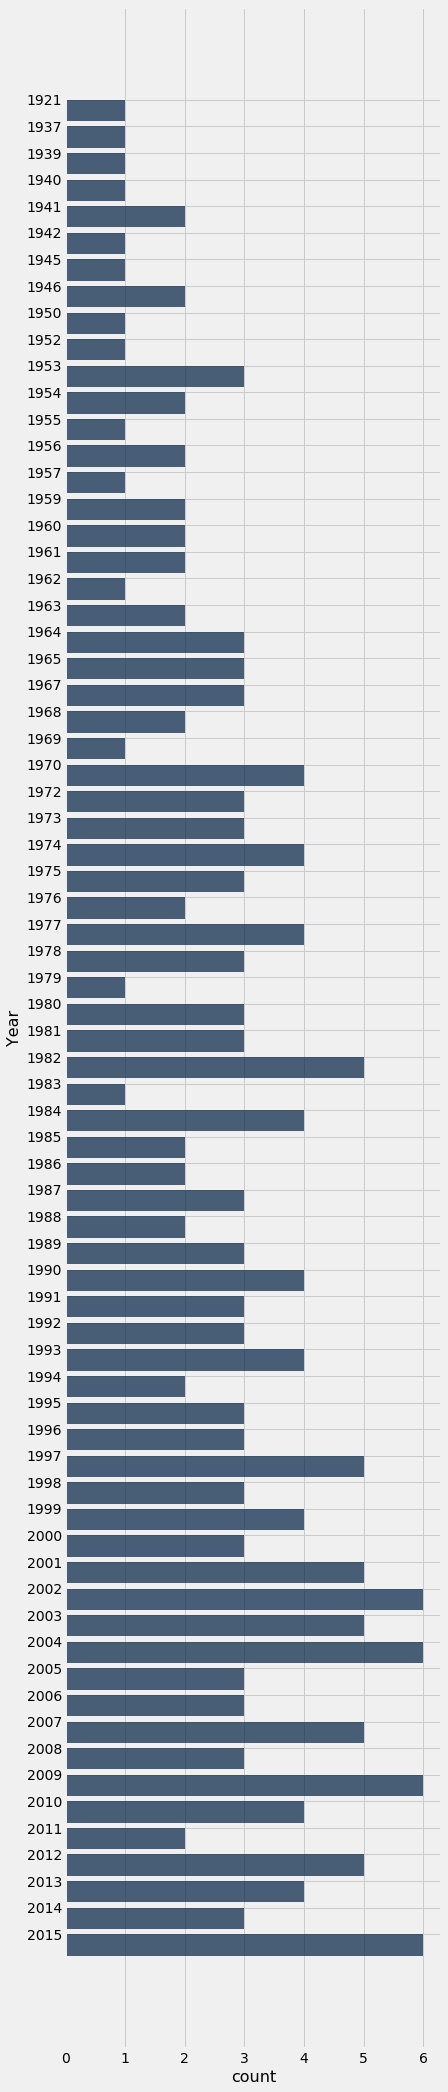

In [12]:
movies_and_years.group('Year').barh('Year')

Now the years are in increasing order. But there is still something disquieting about this bar chart. The bars at 1921 and 1937 are just as far apart from each other as the bars at 1937 and 1939. The bar chart doesn't show that none of the 200 movies were released in the years 1922 through 1936, nor in 1938. Such inconsistencies and omissions make the distribution in the early years hard to understand based on this visualization.

Bar charts are intended as visualizations of categorical variables. When the variable is numerical, the numerical relations between its values have to be taken into account when we create visualizations. That is the topic of the next section.